In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(15, 9)})
sns.set(font_scale=1.5) 

from prophet import Prophet

In [2]:
df = pd.read_csv('data/NG-monthly.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Aug 01, 2022",9.335,7.925,9.669,7.559,88.68K,17.78%
1,"Jul 01, 2022",7.926,5.662,9.413,5.330,27.79K,46.13%
2,"Jun 01, 2022",5.424,8.271,9.664,5.357,2.63M,-33.41%
3,"May 01, 2022",8.145,7.412,9.401,6.430,2.22M,12.44%
4,"Apr 01, 2022",7.244,5.627,8.065,5.505,2.89M,28.39%


In [24]:
# Select Date and Price
df = df[["Date","Price"]] 
# Rename the features: These names are required for the model fitting
df = df.rename(columns = {"Date":"ds","Price":"y"}) 
df.head()

,ds,y
0,"Aug 01, 2022",9.335
1,"Jul 01, 2022",7.926
2,"Jun 01, 2022",5.424
3,"May 01, 2022",8.145
4,"Apr 01, 2022",7.244


In [28]:
m = Prophet(seasonality_mode='additive')
m.fit(df)

16:32:59 - cmdstanpy - INFO - Chain [1] start processing
16:32:59 - cmdstanpy - INFO - Chain [1] done processing


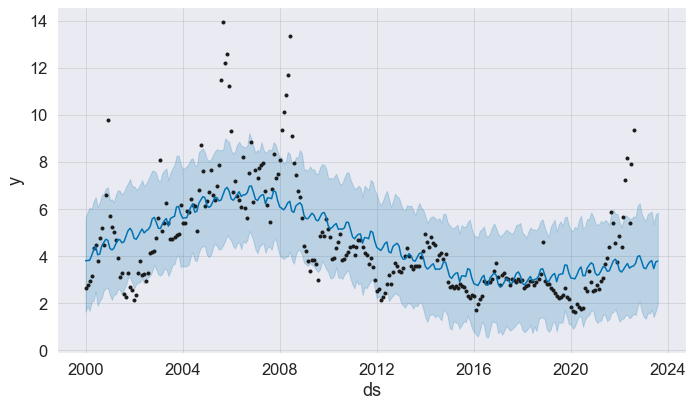

In [29]:
future = m.make_future_dataframe(12, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)


In [21]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2000-01-04,0.230273,1.092205,2.839347,0.230273,0.230273,7.537512,7.537512,7.537512,7.170207,7.170207,7.170207,0.367304,0.367304,0.367304,0.0,0.0,0.0,1.965961
1,2000-01-05,0.232180,1.136502,2.827165,0.232180,0.232180,7.512641,7.512641,7.512641,7.177464,7.177464,7.177464,0.335176,0.335176,0.335176,0.0,0.0,0.0,1.976461
2,2000-01-06,0.234086,1.080752,2.828464,0.234086,0.234086,7.445919,7.445919,7.445919,7.138900,7.138900,7.138900,0.307019,0.307019,0.307019,0.0,0.0,0.0,1.977071
3,2000-01-07,0.235992,1.169938,2.848842,0.235992,0.235992,7.410593,7.410593,7.410593,7.127900,7.127900,7.127900,0.282693,0.282693,0.282693,0.0,0.0,0.0,1.984835
4,2000-01-10,0.241711,1.151248,2.886872,0.241711,0.241711,7.374229,7.374229,7.374229,7.144243,7.144243,7.144243,0.229985,0.229985,0.229985,0.0,0.0,0.0,2.024145


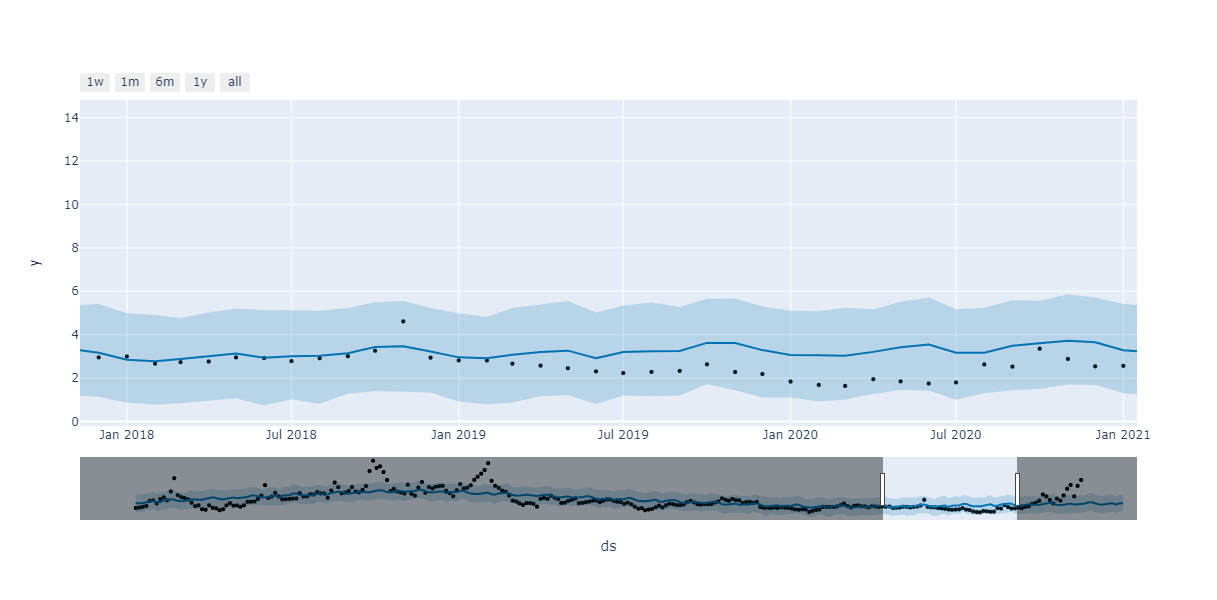

In [30]:
from prophet.plot import plot_plotly, plot_components_plotly
plot_plotly(m, forecast)